In [237]:
from pycaret.regression import *

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [239]:
df=pd.read_csv('/content/alappuzha.csv')

In [240]:
# check installed version
import pycaret
pycaret.__version__

'2.3.10'

In [241]:
df.dropna(inplace=True)

In [242]:
df['date'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MO'].astype(str), format='%Y-%m')

In [243]:
df.drop(['YEAR', 'MO'], axis=1, inplace=True)

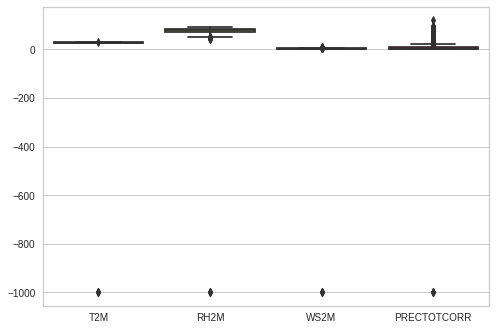

In [244]:
sns.boxplot(data=df[['T2M', 'RH2M', 'WS2M', 'PRECTOTCORR']])
plt.show()

In [245]:
potential_outliers = (df['T2M'] < -20) | (df['T2M'] > 40) | (df['RH2M'] < 0) | (df['RH2M'] > 100) | (df['WS2M'] < 0) | (df['WS2M'] > 50) | (df['PRECTOTCORR'] < 0)
outlier_indices = np.where(potential_outliers)[0]

In [246]:
# Remove the outliers from the data
df = df[~potential_outliers]

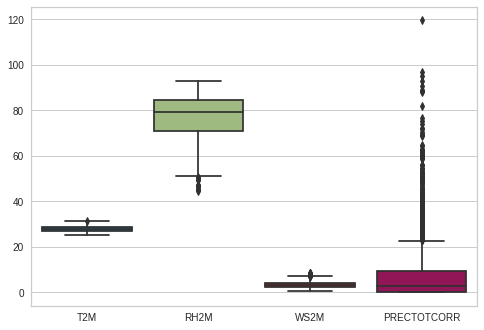

In [247]:
sns.boxplot(data=df[['T2M', 'RH2M', 'WS2M', 'PRECTOTCORR']])
plt.show()

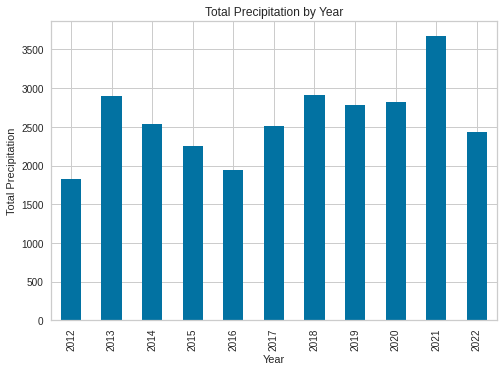

In [248]:
df.groupby(df['date'].dt.year)['PRECTOTCORR'].sum().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Precipitation')
plt.title('Total Precipitation by Year')
plt.show()

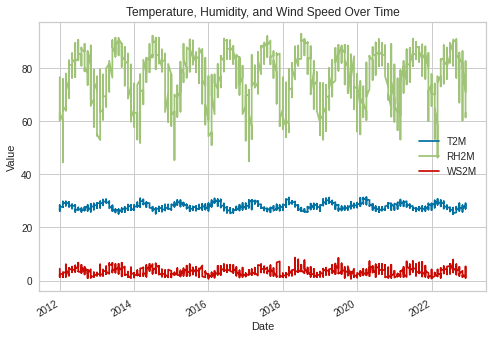

In [249]:
df.set_index('date')[['T2M', 'RH2M', 'WS2M']].plot()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Temperature, Humidity, and Wind Speed Over Time')
plt.show()

In [250]:
df.corr()


,DY,T2M,RH2M,WS2M,PRECTOTCORR
DY,1.000000,0.006355,0.003143,-0.013172,-0.037544
T2M,0.006355,1.000000,-0.606283,-0.296861,-0.294110
RH2M,0.003143,-0.606283,1.000000,0.599702,0.454966
WS2M,-0.013172,-0.296861,0.599702,1.000000,0.414169
PRECTOTCORR,-0.037544,-0.294110,0.454966,0.414169,1.000000


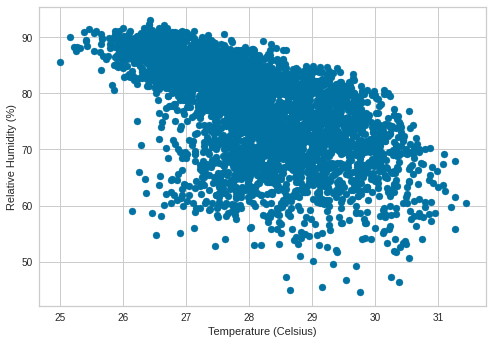

In [251]:
# Create a scatter plot of T2M vs RH2M
plt.scatter(df['T2M'], df['RH2M'])
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Relative Humidity (%)')
plt.show()

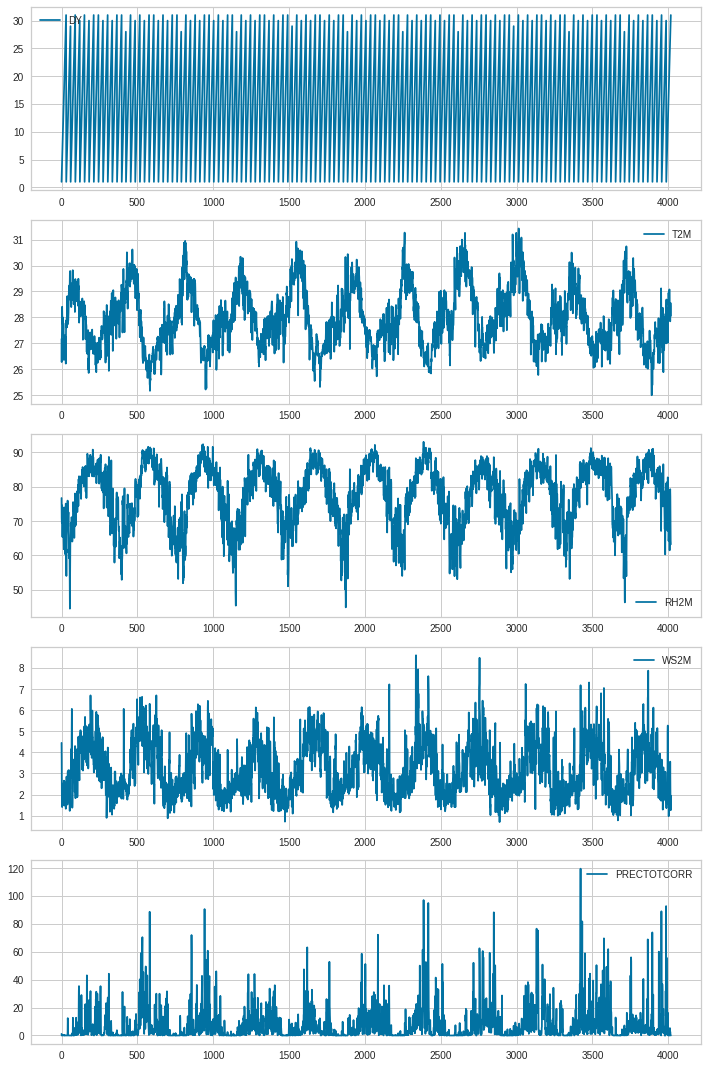

In [252]:
# Create line charts for each attribute over time
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))
df.plot(y='DY', ax=axes[0])
df.plot(y='T2M', ax=axes[1])
df.plot(y='RH2M', ax=axes[2])
df.plot(y='WS2M', ax=axes[3])
df.plot(y='PRECTOTCORR', ax=axes[4])
plt.tight_layout()
plt.show()

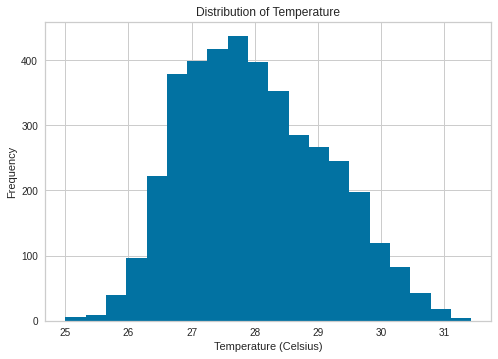

In [253]:
plt.hist(df['T2M'], bins=20)
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.show()

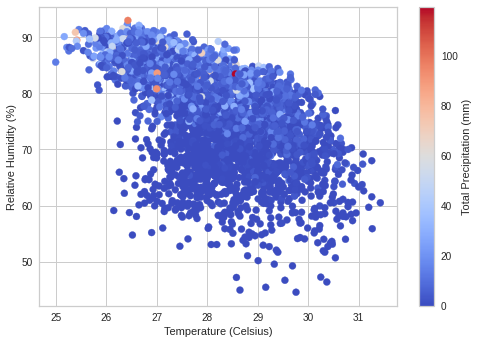

In [254]:
# Create a scatter plot to compare two attributes and color by a third attribute
plt.scatter(df['T2M'], df['RH2M'], c=df['PRECTOTCORR'], cmap='coolwarm')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Relative Humidity (%)')
plt.colorbar(label='Total Precipitation (mm)')
plt.show()

In [255]:
df

,DY,T2M,RH2M,WS2M,PRECTOTCORR,date
0,1,27.17,76.69,4.45,1.13,2012-01-01
1,2,26.28,70.88,3.61,0.00,2012-01-01
2,3,26.91,69.50,1.99,0.00,2012-01-01
3,4,27.71,70.69,1.67,0.00,2012-01-01
4,5,28.41,74.56,1.41,0.00,2012-01-01
...,...,...,...,...,...,...
4013,27,27.85,79.25,3.56,2.35,2022-12-01
4014,28,28.11,77.00,2.24,2.47,2022-12-01
4015,29,28.56,70.56,1.70,0.46,2022-12-01
4016,30,28.43,64.44,1.26,0.36,2022-12-01


In [256]:
train = df[df['date'] < '2021-01-01']
test = df[df['date'] >= '2021-01-01']
train.shape, test.shape

((3288, 6), (727, 6))

In [257]:
df['PRECTOTCORR'].isna().sum()

0

In [258]:
df['PRECTOTCORR'] 

0       1.13
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
4013    2.35
4014    2.47
4015    0.46
4016    0.36
4017    0.03
Name: PRECTOTCORR, Length: 4015, dtype: float64

In [259]:

df['PRECTOTCORR'] = pd.to_numeric(df['PRECTOTCORR'])

In [260]:

exp_reg = setup(data=df, target='PRECTOTCORR')

,Description,Value
0,session_id,7948
1,Target,PRECTOTCORR
2,Original Data,"(4015, 6)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2810, 25)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='PRECTOTCORR', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [261]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,5.080300e+00,8.599230e+01,9.173000e+00,3.434000e-01,0.7963,6.621000e+00,0.900
lightgbm,Light Gradient Boosting Machine,5.350800e+00,9.010180e+01,9.408300e+00,3.081000e-01,0.8507,7.781200e+00,0.144
rf,Random Forest Regressor,5.393600e+00,9.093610e+01,9.449500e+00,3.028000e-01,0.8514,8.520200e+00,1.504
gbr,Gradient Boosting Regressor,5.374200e+00,9.223170e+01,9.491300e+00,3.003000e-01,0.8728,9.294300e+00,0.413
knn,K Neighbors Regressor,5.431800e+00,9.747580e+01,9.777100e+00,2.529000e-01,0.8776,9.000200e+00,0.026
br,Bayesian Ridge,6.149800e+00,1.008613e+02,9.908400e+00,2.412000e-01,1.0585,1.773730e+01,0.015
ridge,Ridge Regression,6.209900e+00,1.008662e+02,9.910900e+00,2.405000e-01,1.0712,1.863300e+01,0.013
lr,Linear Regression,6.212500e+00,1.008753e+02,9.911400e+00,2.404000e-01,1.0718,1.866790e+01,0.637
omp,Orthogonal Matching Pursuit,6.192900e+00,1.026786e+02,1.000390e+01,2.256000e-01,1.0558,1.680740e+01,0.012
lasso,Lasso Regression,6.182600e+00,1.034366e+02,1.002990e+01,2.230000e-01,1.0581,1.715850e+01,0.015


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=7948, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [262]:
final_model = finalize_model(best_model)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=7948, verbose=0, warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samp

In [263]:
train

,DY,T2M,RH2M,WS2M,PRECTOTCORR,date
0,1,27.17,76.69,4.45,1.13,2012-01-01
1,2,26.28,70.88,3.61,0.00,2012-01-01
2,3,26.91,69.50,1.99,0.00,2012-01-01
3,4,27.71,70.69,1.67,0.00,2012-01-01
4,5,28.41,74.56,1.41,0.00,2012-01-01
...,...,...,...,...,...,...
3283,27,28.37,62.12,1.32,0.00,2020-12-01
3284,28,28.54,66.56,1.48,0.00,2020-12-01
3285,29,28.50,70.06,1.05,0.15,2020-12-01
3286,30,28.83,72.69,1.73,6.57,2020-12-01


In [264]:
test

,DY,T2M,RH2M,WS2M,PRECTOTCORR,date
3288,1,27.89,68.56,2.44,0.40,2021-01-01
3289,2,27.80,63.31,2.26,0.02,2021-01-01
3290,3,28.80,67.25,1.16,1.12,2021-01-01
3291,4,28.44,74.56,2.20,3.85,2021-01-01
3292,5,28.16,74.00,1.84,3.86,2021-01-01
...,...,...,...,...,...,...
4013,27,27.85,79.25,3.56,2.35,2022-12-01
4014,28,28.11,77.00,2.24,2.47,2022-12-01
4015,29,28.56,70.56,1.70,0.46,2022-12-01
4016,30,28.43,64.44,1.26,0.36,2022-12-01


In [265]:
df1=test

In [266]:
predictions = predict_model(final_model, data=df1)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=7948, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0,0.0,0.0,1.0,0.0,0.0


In [267]:
model=create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.1571,92.5989,9.6228,0.3285,0.7720,5.2173
1,4.7922,68.9696,8.3048,0.3321,0.7808,5.4088
2,5.4397,122.3740,11.0623,0.4057,0.7995,6.8136
3,4.6012,56.8612,7.5406,0.3863,0.8010,10.9403
4,5.4817,86.9397,9.3241,0.2664,0.8378,7.1064
5,5.3787,121.7997,11.0363,0.4232,0.7782,5.2557
6,3.9589,41.5399,6.4451,0.4258,0.7581,5.1581
7,5.4156,91.9393,9.5885,0.3789,0.8291,4.2172
8,5.1350,91.9927,9.5913,0.1561,0.8050,7.3207


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=7948, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# tuned_et = tune_model(model)

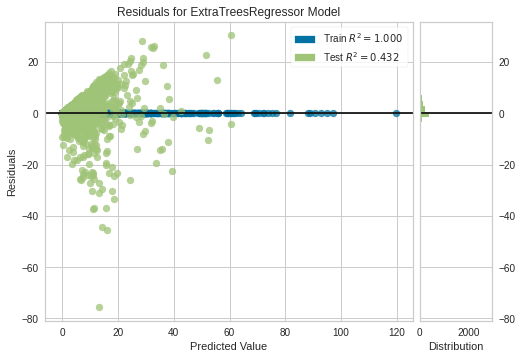

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [269]:
plot_model(model)

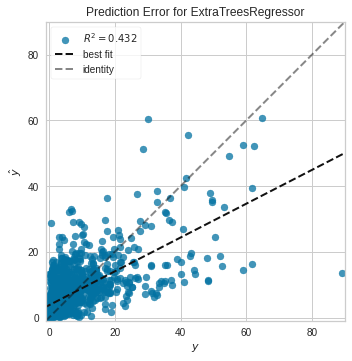

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [270]:
plot_model(model, plot = 'error')

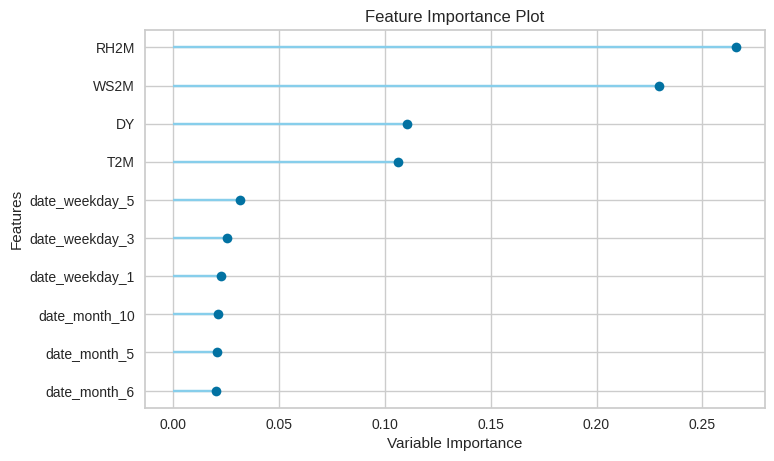

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [271]:
plot_model(model, plot='feature')

In [272]:
evaluate_model(model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=7948, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…